<a href="https://www.kaggle.com/code/najeebz/categories-for-popular-apps-google-play-store?scriptVersionId=160319688" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook Author:
#### Najeeb Zaidi
#### zaidi.nh@gmail.com
#### Github: https://github.com/snajeebz
#### [Disscussions, Comments and Reviews](https://www.kaggle.com/code/najeebz/categories-for-popular-apps-google-play-store)

# Data Source: https://www.kaggle.com/datasets/lava18/google-play-store-apps

# Title: Categories for Popular Apps (Free and Paid)

## Answers:
### which are the most expensive apps?
### Do paid apps generate more revenue or free apps?
### Which category have most expensive paid apps?
### Which category is most popular for free apps?



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Display Max cols and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Disable warning
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


# Loading the Data

In [2]:
df=pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')


# Exploring the data

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df[df['Rating']>5].head(5)

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [5]:
df.drop(index=10472, inplace=True)
df[df['Rating']>5].head(5)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [6]:
print(f'The Number of rows are {df.shape[0]}, and {df.shape[1]} columns')
print(f'Names of the colums:\n {df.columns}')
df.info()

The Number of rows are 10840, and 13 columns
Names of the colums:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12 

In [7]:
df.describe()


Rating
count  9366.000000
mean      4.191757
std       0.515219
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000

__________________________
#### Size should also be a numeric as Ratings and Reviews, but its data type is object, so I guess should convert it to the float.
__________________________________

#### So let's examine the rows of Column Size

In [8]:
df['Size'].head(10)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object

#### There are three different string/characters that are stopping it to be numeric
1. 'M' which represents the filesize in Mb
2. 'k' which represents the filesize in Kb
3. 'Varies with device' That represents variable file sizes for different versions of Android.

_____________________
#### The least unit in the Size column is kb, let's convert that into Mb so we can have not very high values
- A function examine and convert the supplied value can perform the task when applied on all the rows one by one. So, writing that.


In [9]:
def conv2kb(size):
    if isinstance(size,str):
        if 'k' in size:
            return format(float(str(size).replace('k',""))/1024,'.3f')
        if 'M' in size:
            return float(str(size).replace('M',""))
    else: 
        return(size)



# Columns Type Conversion

- We will impute the 'varies with device' by the mean of the column

In [10]:
a=0
df['Size']=df['Size'].str.replace('Varies with device','0.00')  ## replacing the string with a placeholder float, so we can calculate the mean value and since float of 0.00 will become NaN so we can replace it using fillna.
df['Size']=df['Size'].apply(lambda x: conv2kb(x)) #  df['Size'].loc[a]=conv2kb(df['Size'].loc[a])
# now as the column is of object data type and we can't calculate the mean of it, so changing the data type to float so the mean can be calculated and imputed in rows with 0.00 value
df['Size']=pd.to_numeric(df['Size'], errors='raise')
df['Size'].fillna(format(df['Size'].mean(), '.1f'), inplace=True )
df['Size']=pd.to_numeric(df['Size'], errors='raise')
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


#### Since the column has been updated as per our plan and converted into float, now let's rename it to size_Mb so we can remember that all the values in the column are in Megabytes.

In [11]:
# Now in order to keep it in the record, that all Size rows are defined in Kb we will rename to columns.
df.rename(columns={"Size":"size_Mb"}, errors="raise", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   size_Mb         10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


#### Objective for Size is achieved here, let's move further

_____________________

### Dealing with Installs Columns

In [12]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

   #### Operations to be performed on Installs
1. Remove the '+' Sign
2. converting it to the integer

In [13]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+', ""))
df['Installs']=df['Installs'].apply(lambda x: x.replace(',', ""))


In [14]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [15]:
df['Installs']=pd.to_numeric(df['Installs'], errors='raise')
df['Reviews']=pd.to_numeric(df['Reviews'], errors='raise')

#### Now let's make a bin for Installs. The same needs to be done with reviews.

In [16]:
df['Install_bins'] = pd.cut(x=df['Installs'], bins=[0,1, 1000, 100000, 10000000,100000000,1000000000,], labels=[0,1,2,3,4,5])
df['Install_bins']=pd.to_numeric(df['Install_bins'], errors='raise')
# Reviews Bins Might also be required
df['Reviews_bins'] = pd.cut(x=df['Reviews'], bins=[0,1, 100, 10000, 100000,1000000,100000000,], labels=[0,1,2,3,4,5])
df['Reviews_bins']=pd.to_numeric(df['Install_bins'], errors='raise')
df['Reviews_category'] = pd.cut(x=df['Reviews'], bins=[0,1, 100, 10000, 100000,1000000,100000000,], labels=['Zero','Very Low','Low','Median','High','Very High'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   App               10840 non-null  object  
 1   Category          10840 non-null  object  
 2   Rating            9366 non-null   float64 
 3   Reviews           10840 non-null  int64   
 4   size_Mb           10840 non-null  float64 
 5   Installs          10840 non-null  int64   
 6   Type              10839 non-null  object  
 7   Price             10840 non-null  object  
 8   Content Rating    10840 non-null  object  
 9   Genres            10840 non-null  object  
 10  Last Updated      10840 non-null  object  
 11  Current Ver       10832 non-null  object  
 12  Android Ver       10838 non-null  object  
 13  Install_bins      10825 non-null  float64 
 14  Reviews_bins      10825 non-null  float64 
 15  Reviews_category  10244 non-null  category
dtypes: category(1), float64(4),

_________________________
### Now let's convert price into Numeric

In [17]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

#### Let's remove the $ size and convert it to the float

In [18]:
df['Price']=df['Price'].apply(lambda x: x.replace('$', ''))
df['Price']=pd.to_numeric(df['Price'], errors='raise')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   App               10840 non-null  object  
 1   Category          10840 non-null  object  
 2   Rating            9366 non-null   float64 
 3   Reviews           10840 non-null  int64   
 4   size_Mb           10840 non-null  float64 
 5   Installs          10840 non-null  int64   
 6   Type              10839 non-null  object  
 7   Price             10840 non-null  float64 
 8   Content Rating    10840 non-null  object  
 9   Genres            10840 non-null  object  
 10  Last Updated      10840 non-null  object  
 11  Current Ver       10832 non-null  object  
 12  Android Ver       10838 non-null  object  
 13  Install_bins      10825 non-null  float64 
 14  Reviews_bins      10825 non-null  float64 
 15  Reviews_category  10244 non-null  category
dtypes: category(1), float64(5),

## Dealing with the Type:
- The Column Type has two unique values Paid and Free classify apps Free
- Its better to convert it into boolean which we can utilize later for analysis

In [19]:
#df=pd.get_dummies(df,columns=['Type'])
#df.head(10)

#### We have used get_dummies, which has created two boolean columns out of the type Type_Free and Type_Paid

_____
# Imputing Nulls

In [20]:
df.describe()

Rating       Reviews       size_Mb      Installs         Price  \
count  9366.000000  1.084000e+04  10840.000000  1.084000e+04  10840.000000   
mean      4.191757  4.441529e+05     21.513637  1.546434e+07      1.027368   
std       0.515219  2.927761e+06     20.747805  8.502936e+07     15.949703   
min       1.000000  0.000000e+00      0.008000  0.000000e+00      0.000000   
25%       4.000000  3.800000e+01      5.900000  1.000000e+03      0.000000   
50%       4.300000  2.094000e+03     18.000000  1.000000e+05      0.000000   
75%       4.500000  5.477550e+04     26.000000  5.000000e+06      0.000000   
max       5.000000  7.815831e+07    100.000000  1.000000e+09    400.000000   

       Install_bins  Reviews_bins  
count  10825.000000  10825.000000  
mean       2.290531      2.290531  
std        0.964411      0.964411  
min        0.000000      0.000000  
25%        2.000000      2.000000  
50%        2.000000      2.000000  
75%        3.000000      3.000000  
max        5.000000      5.000000

In [21]:
df.isnull().sum()


App                    0
Category               0
Rating              1474
Reviews                0
size_Mb                0
Installs               0
Type                   1
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            2
Install_bins          15
Reviews_bins          15
Reviews_category     596
dtype: int64

### Deleting rows from the df which are nan in Current Ver, Android Ver Genres and Type, as these are less than 0.1%


In [22]:
df=df[~df['Current Ver'].isna() & ~df['Genres'].isna() & ~df['Type'].isna() & ~df['Android Ver'].isna()]
print('Nulls summary: \n',df.isnull().sum())
df.head(10)


Nulls summary: 
 App                    0
Category               0
Rating              1469
Reviews                0
size_Mb                0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
Install_bins          14
Reviews_bins          14
Reviews_category     594
dtype: int64


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

   Reviews  size_Mb  Installs  Type  Price Content Rating  \
0      159     19.0     10000  Free    0.0       Everyone   
1      967     14.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644     25.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   
5      167      5.6     50000  Free    0.0       Everyone   
6      178     19.0     50000  Free    0.0       Everyone   
7    36815     29.0   1000000  Free    0.0       Everyone   
8    13791     33.0   1000000  Free    0.0       Everyone   
9      121      3.1     10000  Free    0.0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  Install_bins  Reviews_bins Reviews_category  
0  4.0.3 and up           2.0           2.0              Low  
1  4.0.3 and up           3.0           3.0              Low  
2  4.0.3 and up           3.0           3.0           Median  
3    4.2 and up           4.0           4.0             High  
4    4.4 and up           2.0           2.0              Low  
5    2.3 and up           2.0           2.0              Low  
6  4.0.3 and up           2.0           2.0              Low  
7    4.2 and up           3.0           3.0           Median  
8    3.0 and up           3.0           3.0           Median  
9  4.0.3 and up           2.0           2.0              Low

__________
# Initial Assessment:
- Ratings have plenty of Nans around 20% that needs to be filled. 
- Nans do not belong to single category or price or size or installs group but distribution is pretty normallized accross the data. So we can't fill it with simple Mean, Median or Mode etc.
## Tackling Plan:
- We will see the correlation between the different columns.
- Identify the relationship between different columns and decide.
- If required will use ML/DL to fill the missing data.

In [23]:
df['Reviews'].max()

78158306

In [24]:
#Separating Numeric data into another dataframe for further analysis
df2=df[['Installs', 'Reviews', 'Price', 'Rating','Install_bins','Reviews_bins']]
# Creating another dataframe without nulls for analysis
df2=df2.dropna()
print('Installation Bins: \n',df2['Install_bins'].value_counts())
print('Group by: \n',df2.groupby(df2['Install_bins'])['Rating'].describe())
print("Correlation: \n",df2.corr())
print("Mean \n", df2.groupby(df2['Install_bins'])['Rating'].mean())
figure= px.imshow(df2.corr(), text_auto=True, width=1200, height=1200)
figure.show()

Installation Bins: 
 Install_bins
3.0    4117
2.0    3056
1.0    1356
4.0     698
5.0     130
0.0       3
Name: count, dtype: int64
Group by: 
                count      mean       std  min  25%  50%  75%  max
Install_bins                                                     
0.0              3.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0
1.0           1356.0  4.196976  0.833876  1.0  3.9  4.4  4.8  5.0
2.0           3056.0  4.066001  0.555036  1.4  3.8  4.2  4.5  5.0
3.0           4117.0  4.246247  0.341577  1.8  4.1  4.3  4.5  4.9
4.0            698.0  4.386533  0.192817  3.1  4.3  4.4  4.5  4.8
5.0            130.0  4.309231  0.186126  3.7  4.2  4.3  4.4  4.7
Correlation: 
               Installs   Reviews     Price    Rating  Install_bins  \
Installs      1.000000  0.641605 -0.011895  0.051337      0.438473   
Reviews       0.641605  1.000000 -0.009824  0.068133      0.334010   
Price        -0.011895 -0.009824  1.000000 -0.021919     -0.059536   
Rating        0.051337  0.068133 

## Not Much Correlation between the colums.

- Max correlation between Ratings and any other column is less than 13%
- Machine Learning algorithms (regression) might not generate accurate results.
- Similarly Deep Learning algorithms might not have enough features to predict accurately.
- The best way is that as Installs and Reviews are correlated so we should statistically fill the Nans.
- But when we inspect the mean grouped by the Installs_bin, not much deviation between each bin. So I guess total mean will fall in the same range 4.19-4.38
- So filling the nan's with mean should do the task

### But there's another problem
- If we  fill all nans ratings with mean rating. It will assign mean rating to rows even if it has zero installs, which is not practically possible. How can one rate an app without installing it?
- So, idea is to replace zero install nan ratings with 0.0 and the rest of the nan ratings with the mean value.

##### Enumerating the Ratings

In [25]:
print('Total Nan Rating with Zero Installs: ',df[df['Installs']==0]['Rating'].isnull().sum())
print('Total nan in Rating: ',df['Rating'].isnull().sum())

Total Nan Rating with Zero Installs:  14
Total nan in Rating:  1469


#### Filling the nans

In [26]:
print('Mean Rating: ', df['Rating'].mean())
df.loc[df['Installs'] == 0, 'Rating'] = 0.0    # Replacing the value of Rating to 0.0 the locations where df[Installs]==0
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
print('Count of Nan Ratings: ',df['Rating'].isnull().sum())
print('Mean Rating value where Installs is zero: ',df[df['Installs']==0]['Rating'].mean())
print('Mean Rating value where Installs is non zero: ',df[df['Installs']>0.1]['Rating'].mean())

Mean Rating:  4.191837606837606
Count of Nan Ratings:  0
Mean Rating value where Installs is zero:  0.0
Mean Rating value where Installs is non zero:  4.1909953510467215


#### Now let's bin the Ratings into User_Rated

In [27]:
df['User_Rated'] = pd.cut(x=df['Rating'], bins=[-1,0, 1,3,4,4.5,5,], labels=['Zero','Very Low','Low','Medium','High','Very High'])
df['User_Rated'].unique()

['High', 'Medium', 'Very High', 'Low', 'Very Low', 'Zero']
Categories (6, object): ['Zero' < 'Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

_____
# Data Visualization

<Axes: ylabel='Frequency'>

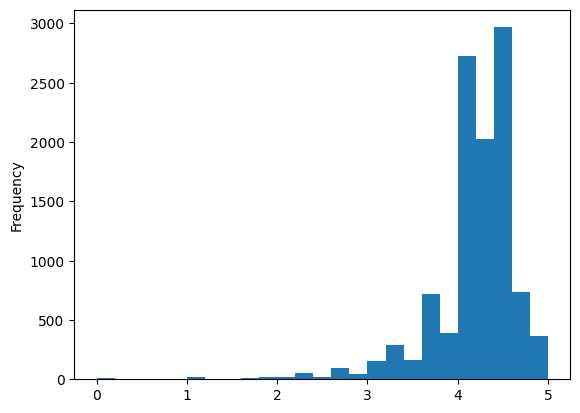

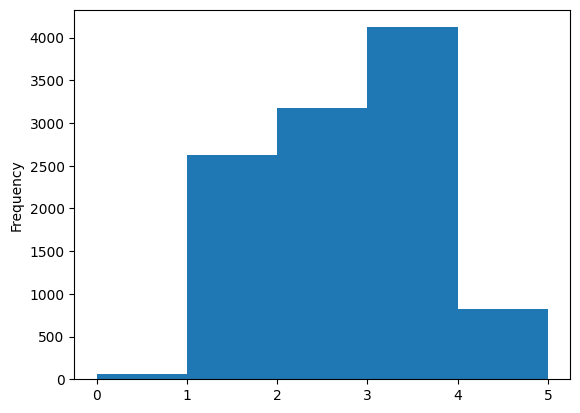

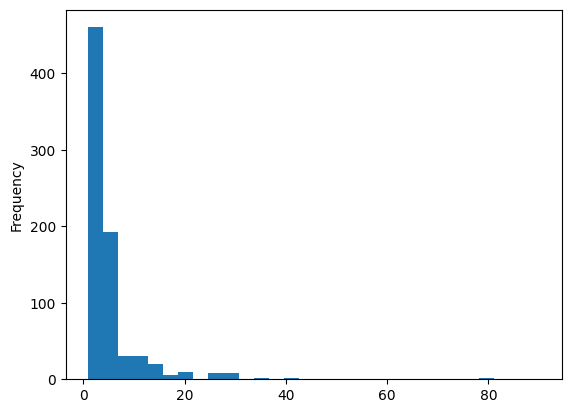

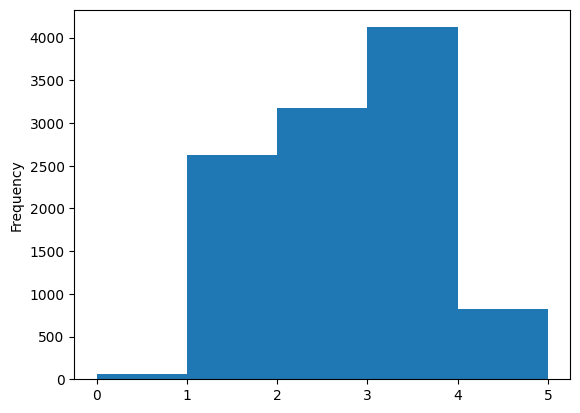

In [28]:
plt.figure(1)
df['Rating'].plot.hist(bins=25)
plt.figure(2)
df['Install_bins'].plot.hist(bins=5)
plt.figure(3)
df['Price'][(df['Price']>0) & (df['Price']<100)].plot.hist(bins=30)
plt.figure(4)
df['Reviews_bins'].plot.hist(bins=5)


#### Price Vs Ratings

In [29]:
df['Price'].groupby(df['Category']).mean()

Category
ART_AND_DESIGN         0.093281
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.520739
BUSINESS               0.402761
COMICS                 0.000000
COMMUNICATION          0.214832
DATING                 0.134316
EDUCATION              0.115128
ENTERTAINMENT          0.053557
EVENTS                 1.718594
FAMILY                 1.236682
FINANCE                7.925765
FOOD_AND_DRINK         0.066772
GAME                   0.251136
HEALTH_AND_FITNESS     0.197478
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011786
LIFESTYLE              6.180288
MAPS_AND_NAVIGATION    0.196715
MEDICAL                3.110065
NEWS_AND_MAGAZINES     0.014064
PARENTING              0.159667
PERSONALIZATION        0.390949
PHOTOGRAPHY            0.400627
PRODUCTIVITY           0.591816
SHOPPING               0.021077
SOCIAL                 0.054136
SPORTS                 0.260417
TOOLS                  0.316599
TRAVEL_AND_LOCAL       0.193605

In [30]:
fig=px.bar(data_frame=df, x=df['Price'].groupby(df['Category']).mean(),y=df['Category'].unique(), color=df['Reviews'].groupby(df['Category']).mean(), width=1800, height=1000)
fig.update_layout(
    title=" Mean Price vs Categories",
    xaxis_title="Mean Prices",
    yaxis_title="Apps Categories",
    legend_title="Installs Count Bins",
    showlegend=True,
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
fig.show()


In [31]:
fig=px.scatter(x=df['Reviews'][(df['Price']>5) & (df['Price']<150)], y=df['Category'][(df['Price']>5) & (df['Price']<150)],size=df['Price'][(df['Price']>5) & (df['Price']<150)],color=df['Install_bins'][(df['Price']>5) & (df['Price']<150)],log_x=True, width=1800, height=1000)
#fig = go.Figure(data=[go.Surface(z=df['Price'], x=df['Reviews'], y=df['Category'])])
#fig.update_layout(title='Mt Bruno Elevation', autosize=True,
  #                width=1800, height=1200,
                 
fig.update_layout(
    title="Ratings vs Categories App Prices from 5$-150$",
    xaxis_title="Reviews Received",
    yaxis_title="Apps Categories",
    
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [32]:
fig = go.Figure(data=[
    go.Bar(name='Free Apps', x=df['Category'].unique(), y=df['Installs'][df['Price']==0].groupby(df['Category']).mean()),
    go.Bar(name='Paid Apps', x=df['Category'].unique(), y=df['Installs'][df['Price']!=0].groupby(df['Category']).mean())
])
# Change the bar mode
fig.update_layout(barmode='group', width=1800, height=1200)
fig.update_layout(
    title="Free vs Paid App Average Installs in each Categories",
    xaxis_title="Apps Category",
    yaxis_title="Average Installs",
    
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()
fig = go.Figure(data=[
    go.Bar(name='Free Apps', x=df['Category'].unique(), y=df['Reviews'][df['Price']==0].groupby(df['Category']).mean()),
    go.Bar(name='Paid Apps', x=df['Category'].unique(), y=df['Reviews'][df['Price']!=0].groupby(df['Category']).mean())
])
# Change the bar mode
fig.update_layout(barmode='group', width=1800, height=1200)
fig.update_layout(
    title="Free vs Paid App Average Reviews in each Categories",
    xaxis_title="Apps Category",
    yaxis_title="Mean Reviews",
    
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()
fig = go.Figure(data=[
    go.Bar(name='Free Apps', x=df['Category'].unique(), y=df['size_Mb'][df['Price']==0].groupby(df['Category']).mean()),
    go.Bar(name='Paid Apps', x=df['Category'].unique(), y=df['size_Mb'][df['Price']!=0].groupby(df['Category']).mean())
])
# Change the bar mode
fig.update_layout(barmode='group', width=1800, height=1200)
fig.update_layout(
    title="Free vs Paid App Size Comparison for each Categories",
    xaxis_title="Apps Category",
    yaxis_title="Mean Size in MB",
    
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [33]:
from scipy.interpolate import griddata
x=df['size_Mb'][df['Price']>0]
z=df['Reviews'][df['Price']>0]
y=df['Installs'][df['Price']>0]
X,Y = np.meshgrid(x,y)
Z = griddata((x,y),z,(X,Y), method='cubic')
fig = go.Figure(go.Surface(x=x,y=y,z=Z))
fig.update_layout(
    title="Ratings vs Categories App Prices from 5$-150$",
    xaxis_title="Reviews Received",
    yaxis_title="Apps Categories",
    width=1800, height=1000,
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [34]:
fig=px.bar(x=df['Category'].unique(), y=df['Price'].groupby(df['Category']).mean(), color=df['Installs'].groupby(df['Category']).sum(), width=1800, height=1000)
fig.update_layout(
    title="App Prices vs Categories",
    xaxis_title="App Categories",
    yaxis_title="Mean Price in Category",
    width=1800, height=1000,
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [35]:
fig=px.pie(df[df['Type']=='Paid'], values='Install_bins', names='Category', width=1800, height=1200)
fig.update_layout(
    title="Paid App Installs vs App Categories",
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()

## 

#### A very important metric should be Installs/Review let's analyze that
- Making a new column Installs/Review naming it Review_Rate

In [36]:
df['Review_Rate']=df['Installs']/df['Reviews'][df['Reviews']>0] # Since number of reviews can be 0 which will make Raview Rate infinity, so filtering 0 reviews out which will result in Nan values in some rows
df['Review_Rate'].fillna(0, inplace=True) #As Nan values have 0 reviews, so filling the 0 Review Rate in these
print(df['Review_Rate'].mean())


206.47405096838347


### Let's see if the average review rate differs in each install bin.

In [37]:
df.groupby(df['Install_bins'])['Review_Rate'].mean()
figure=px.bar(data_frame=df, x=df['Category'].unique(),y=df.groupby(df['Category'])['Review_Rate'].mean(), color=df.groupby(df['Category'])['Rating'].mean(), width=1800, height=1000)
figure.update_layout(
    title="Review Rates vs App Categories (Color is App Rating)",
    yaxis_title="Mean Installs per Review",
    xaxis_title="Apps Categories",
    width=1800, height=1000,
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
figure.show()


In [38]:
#fig=px.sunburst(df,path=['Type','User_Rated','Content Rating','Reviews_category'], color='Category', values='Review_Rate', width=1800, height=1200)

#fig.show()

In [39]:
fig=px.pie(df, values='Install_bins', names='Category', width=1800, height=1200)
fig.update_layout(
    title="App Installs vs App Categories",
   font=dict(
       family="Courier New, monospace",
       size=18,
        color="RebeccaPurple"
    )
)
fig.show()

# Observations:

- Free Apps are more popular get more reviews and installs in comparison of paid apps in all categories apart of Entertainment and Games.
- Weather apps hardly get any reviews and are also low rated in comparison with other categories.
- Rule of thumb in most of the categories is more installs = more reviews.
- Parenting and Family and Home apps have good Installs/Review ratio.
- Finance apps have good price and install ratio.
- Food and Drinks apps are expensive generally but very less installs.
- App size doesn't have any impact on price.
- Most Popular App Category is 'Family' followed by 'Games' and 'Tools'.
- In Paid Apps, most downloaded category is 'Family' followed by 'Medical, 'Games' and 'Personalization'.
- Although there are paid apps with price tags upto 400USD , but most of the apps are priced less than 20USD.

